# NOTEBOOK 02: PHÂN TÍCH THỐNG KÊ MÔ TẢ VÀ TRỰC QUAN HÓA

## Mục tiêu:
- Phân tích thống kê mô tả chi tiết các biến
- Tạo các biểu đồ trực quan hóa dữ liệu
- Phân tích mối quan hệ giữa các biến với đột quỵ
- Khám phá các pattern và insight từ dữ liệu

## 1. IMPORT THƯ VIỆN VÀ TẢI DỮ LIỆU

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Cấu hình font tiếng Việt cho matplotlib
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ Đã import thành công các thư viện!")

✅ Đã import thành công các thư viện!


In [6]:
# Tải dữ liệu đã xử lý
try:
    duLieu = pd.read_csv('/content/drive/MyDrive/PHÂN TÍCH DỮ LIỆU /du_lieu_da_xu_ly.csv')
    print("✅ Đã tải dữ liệu từ file đã xử lý")
except:
    # Nếu chưa có file xử lý, tải từ file gốc và xử lý nhanh
    duLieu = pd.read_csv('/content/drive/MyDrive/PHÂN TÍCH DỮ LIỆU /du_lieu_da_xu_ly.csv')
    duLieu['bmi'] = duLieu['bmi'].replace('N/A', np.nan)
    duLieu['bmi'] = pd.to_numeric(duLieu['bmi'], errors='coerce')
    duLieu['bmi'].fillna(duLieu['bmi'].median(), inplace=True)
    print("✅ Đã tải và xử lý nhanh dữ liệu từ file gốc")

print(f"📊 Kích thước dữ liệu: {duLieu.shape}")
print(f"📋 Các cột: {list(duLieu.columns)}")

✅ Đã tải dữ liệu từ file đã xử lý
📊 Kích thước dữ liệu: (5110, 16)
📋 Các cột: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'nhomTuoi', 'nhomBMI', 'nhomGlucose', 'diemNguyCo']


## 2. PHÂN TÍCH THỐNG KÊ MÔ TẢ TỔNG QUAN

In [7]:
# Thống kê tổng quan về biến mục tiêu
print("🎯 PHÂN TÍCH BIẾN MỤC TIÊU - ĐỘT QUỴ:")
print("="*50)

phanPhoiStroke = duLieu['stroke'].value_counts()
tyLePhanTram = duLieu['stroke'].value_counts(normalize=True) * 100

bangTongQuan = pd.DataFrame({
    'soLuong': phanPhoiStroke,
    'tyLePhanTram': tyLePhanTram.round(2)
})
bangTongQuan.index = ['Không đột quỵ (0)', 'Có đột quỵ (1)']
print(bangTongQuan)

# Tính tỷ lệ mất cân bằng
tyLeMacBenh = tyLePhanTram[1]
tyLeMatCanBang = phanPhoiStroke[0] / phanPhoiStroke[1]
print(f"\n📊 Tỷ lệ mắc bệnh: {tyLeMacBenh:.2f}%")
print(f"📊 Tỷ lệ mất cân bằng: {tyLeMatCanBang:.1f}:1 (Không mắc : Mắc bệnh)")

if tyLeMacBenh < 10:
    print("⚠️  Dữ liệu có tính mất cân bằng cao - cần lưu ý khi xây dựng mô hình")

🎯 PHÂN TÍCH BIẾN MỤC TIÊU - ĐỘT QUỴ:
                   soLuong  tyLePhanTram
Không đột quỵ (0)     4861         95.13
Có đột quỵ (1)         249          4.87

📊 Tỷ lệ mắc bệnh: 4.87%
📊 Tỷ lệ mất cân bằng: 19.5:1 (Không mắc : Mắc bệnh)
⚠️  Dữ liệu có tính mất cân bằng cao - cần lưu ý khi xây dựng mô hình


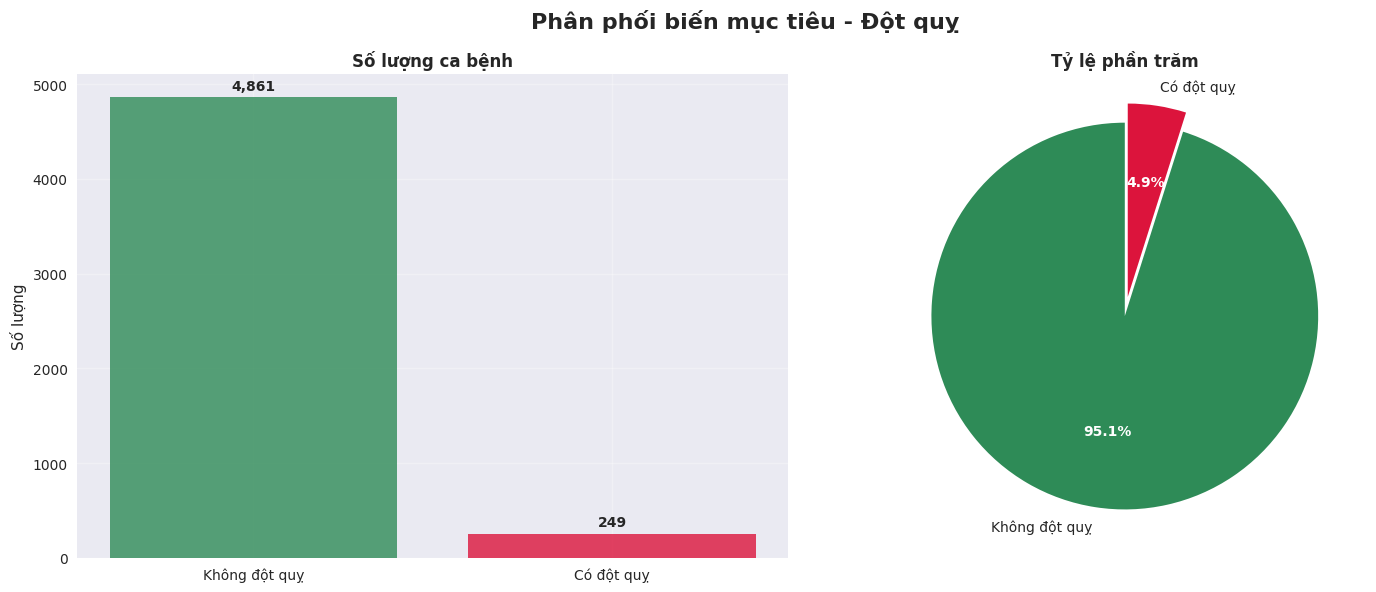

In [8]:
# Biểu đồ phân phối biến mục tiêu
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Phân phối biến mục tiêu - Đột quỵ', fontsize=16, fontweight='bold')

# Biểu đồ cột
nhanStroke = ['Không đột quỵ', 'Có đột quỵ']
mauSac = ['#2E8B57', '#DC143C']

bars = axes[0].bar(nhanStroke, phanPhoiStroke.values, color=mauSac, alpha=0.8)
axes[0].set_title('Số lượng ca bệnh', fontweight='bold')
axes[0].set_ylabel('Số lượng')
axes[0].grid(True, alpha=0.3)

# Thêm nhãn trên cột
for bar, value in zip(bars, phanPhoiStroke.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'{value:,}', ha='center', va='bottom', fontweight='bold')

# Biểu đồ tròn
wedges, texts, autotexts = axes[1].pie(phanPhoiStroke.values, labels=nhanStroke,
                                      colors=mauSac, autopct='%1.1f%%',
                                      startangle=90, explode=(0, 0.1))
axes[1].set_title('Tỷ lệ phần trăm', fontweight='bold')

# Làm đẹp text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

## 3. PHÂN TÍCH CÁC BIẾN SỐ

In [9]:
# Thống kê mô tả các biến số theo nhóm đột quỵ
print("📊 THỐNG KÊ MÔ TẢ CÁC BIẾN SỐ THEO NHÓM ĐỘT QUỴ:")
print("="*60)

cacBienSo = ['age', 'avg_glucose_level', 'bmi']

for bien in cacBienSo:
    print(f"\n🔍 Biến '{bien.upper()}':")
    print("-" * 40)

    # Thống kê theo nhóm
    thongKeTheoNhom = duLieu.groupby('stroke')[bien].describe().round(2)
    thongKeTheoNhom.index = ['Không đột quỵ', 'Có đột quỵ']
    print(thongKeTheoNhom)

    # Kiểm định t-test
    nhomKhongDotQuy = duLieu[duLieu['stroke'] == 0][bien]
    nhomCoDotQuy = duLieu[duLieu['stroke'] == 1][bien]

    tStat, pValue = ttest_ind(nhomKhongDotQuy, nhomCoDotQuy)

    print(f"\n📈 Kiểm định t-test:")
    print(f"   t-statistic: {tStat:.4f}")
    print(f"   p-value: {pValue:.6f}")

    if pValue < 0.05:
        print(f"   ✅ Có sự khác biệt có ý nghĩa thống kê (p < 0.05)")
    else:
        print(f"   ❌ Không có sự khác biệt có ý nghĩa thống kê (p >= 0.05)")

📊 THỐNG KÊ MÔ TẢ CÁC BIẾN SỐ THEO NHÓM ĐỘT QUỴ:

🔍 Biến 'AGE':
----------------------------------------
                count   mean    std   min   25%   50%   75%   max
Không đột quỵ  4861.0  41.97  22.29  0.08  24.0  43.0  59.0  82.0
Có đột quỵ      249.0  67.73  12.73  1.32  59.0  71.0  78.0  82.0

📈 Kiểm định t-test:
   t-statistic: -18.0808
   p-value: 0.000000
   ✅ Có sự khác biệt có ý nghĩa thống kê (p < 0.05)

🔍 Biến 'AVG_GLUCOSE_LEVEL':
----------------------------------------
                count    mean    std    min    25%     50%     75%     max
Không đột quỵ  4861.0  104.80  43.85  55.12  77.12   91.47  112.83  267.76
Có đột quỵ      249.0  132.54  61.92  56.11  79.79  105.22  196.71  271.74

📈 Kiểm định t-test:
   t-statistic: -9.5134
   p-value: 0.000000
   ✅ Có sự khác biệt có ý nghĩa thống kê (p < 0.05)

🔍 Biến 'BMI':
----------------------------------------
                count   mean   std   min   25%   50%   75%   max
Không đột quỵ  4861.0  28.80  7.78  10.3  23.

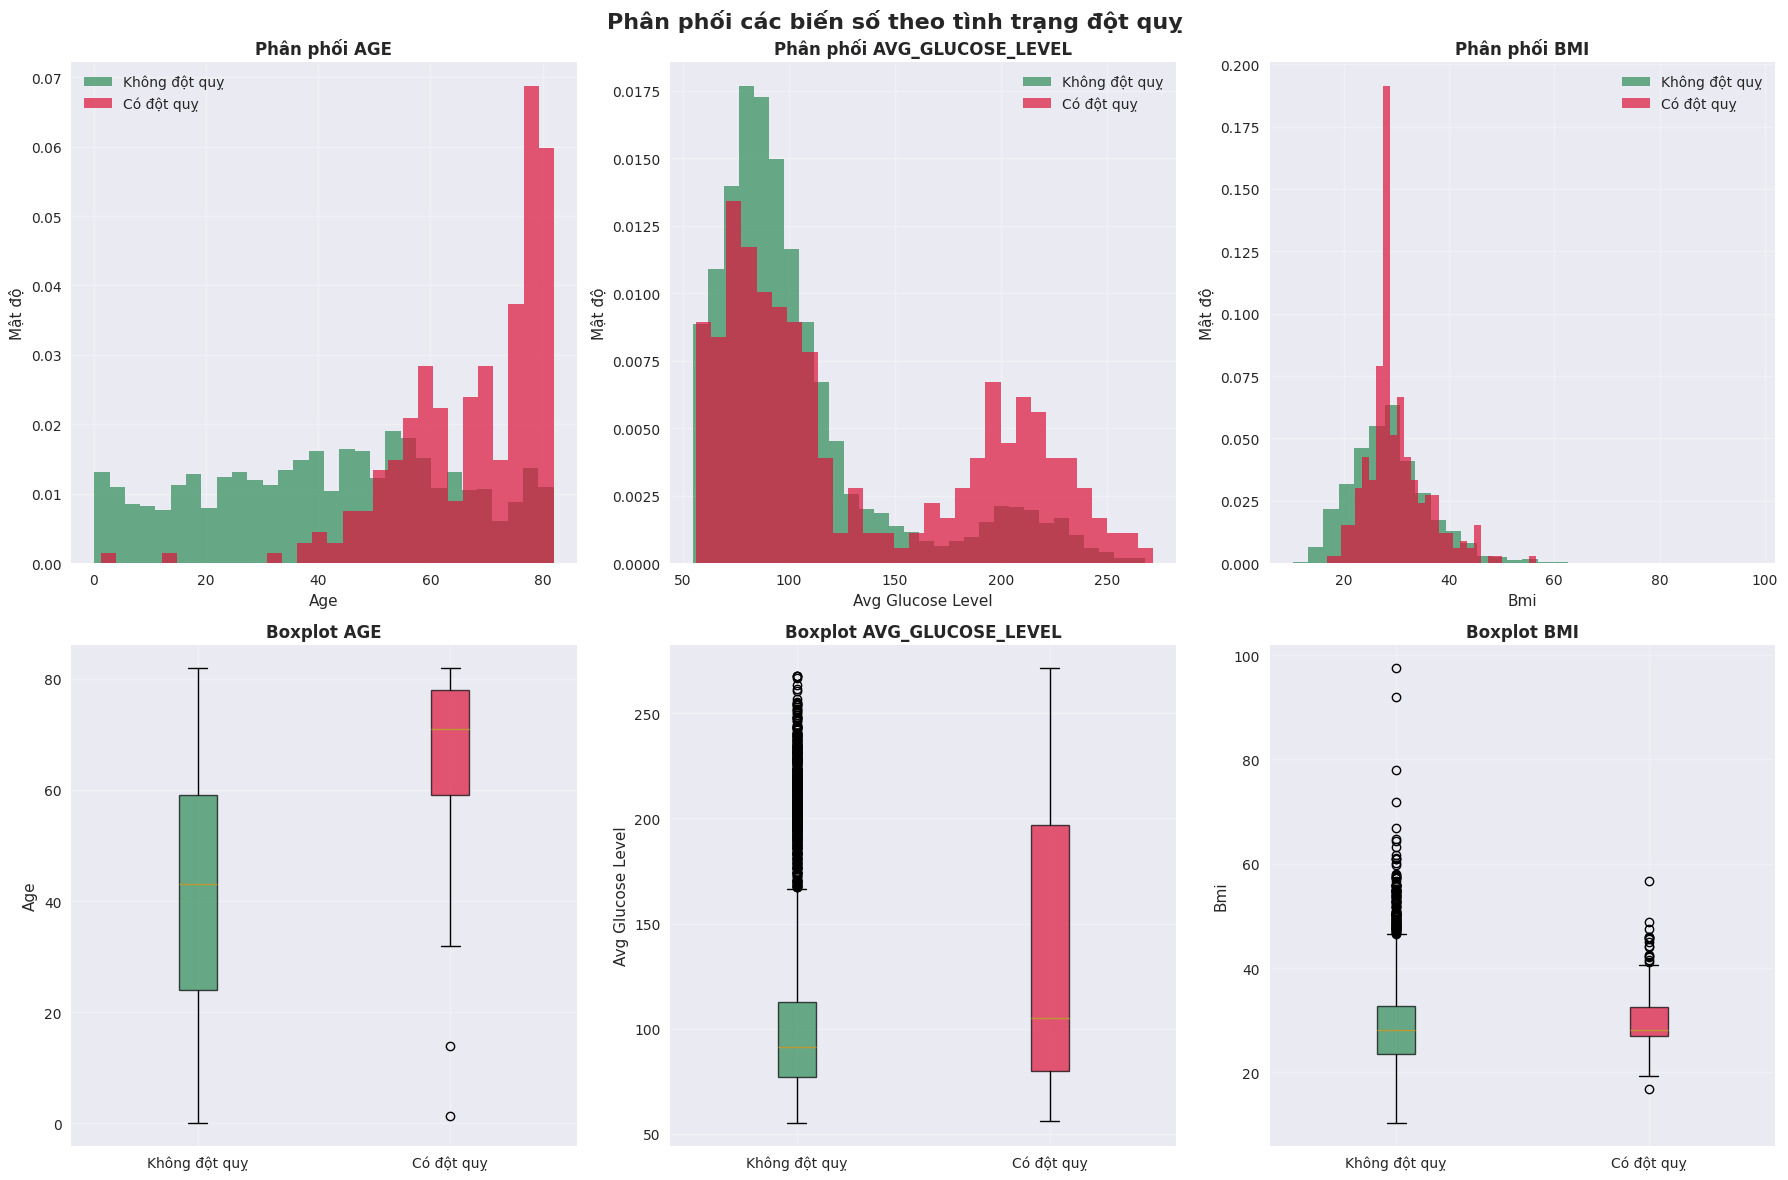

In [10]:
# Biểu đồ phân phối các biến số
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Phân phối các biến số theo tình trạng đột quỵ', fontsize=16, fontweight='bold')

mauSac = ['#2E8B57', '#DC143C']
nhanNhom = ['Không đột quỵ', 'Có đột quỵ']

for i, bien in enumerate(cacBienSo):
    # Histogram
    for j, stroke_val in enumerate([0, 1]):
        duLieuNhom = duLieu[duLieu['stroke'] == stroke_val][bien]
        axes[0, i].hist(duLieuNhom, bins=30, alpha=0.7,
                       color=mauSac[j], label=nhanNhom[j], density=True)

    axes[0, i].set_title(f'Phân phối {bien.upper()}', fontweight='bold')
    axes[0, i].set_xlabel(bien.replace('_', ' ').title())
    axes[0, i].set_ylabel('Mật độ')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

    # Boxplot
    duLieuBoxplot = [duLieu[duLieu['stroke'] == 0][bien],
                     duLieu[duLieu['stroke'] == 1][bien]]

    box_plot = axes[1, i].boxplot(duLieuBoxplot, labels=nhanNhom, patch_artist=True)

    # Tô màu cho boxplot
    for patch, color in zip(box_plot['boxes'], mauSac):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[1, i].set_title(f'Boxplot {bien.upper()}', fontweight='bold')
    axes[1, i].set_ylabel(bien.replace('_', ' ').title())
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. PHÂN TÍCH CÁC BIẾN PHÂN LOẠI

In [11]:
# Phân tích các biến phân loại
print("📊 PHÂN TÍCH CÁC BIẾN PHÂN LOẠI:")
print("="*50)

cacBienPhanLoai = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                   'work_type', 'Residence_type', 'smoking_status']

ketQuaChiSquare = []

for bien in cacBienPhanLoai:
    print(f"\n🔍 Biến '{bien.upper()}':")
    print("-" * 40)

    # Tạo bảng chéo
    bangCheo = pd.crosstab(duLieu[bien], duLieu['stroke'], margins=True)
    bangCheo.columns = ['Không đột quỵ', 'Có đột quỵ', 'Tổng']
    print(bangCheo)

    # Tính tỷ lệ phần trăm
    print(f"\n📈 Tỷ lệ đột quỵ theo {bien}:")
    tyLeStroke = duLieu.groupby(bien)['stroke'].agg(['count', 'sum', 'mean']).round(4)
    tyLeStroke.columns = ['tongSo', 'soCoDotQuy', 'tyLeDotQuy']
    tyLeStroke['tyLePhanTram'] = (tyLeStroke['tyLeDotQuy'] * 100).round(2)
    print(tyLeStroke)

    # Kiểm định Chi-square
    if bien not in ['hypertension', 'heart_disease']:  # Bỏ qua biến binary đơn giản
        bangCheoKhongMargin = pd.crosstab(duLieu[bien], duLieu['stroke'])
        chi2, pValue, dof, expected = chi2_contingency(bangCheoKhongMargin)

        print(f"\n🧮 Kiểm định Chi-square:")
        print(f"   Chi-square: {chi2:.4f}")
        print(f"   p-value: {pValue:.6f}")
        print(f"   Degrees of freedom: {dof}")

        if pValue < 0.05:
            print(f"   ✅ Có mối quan hệ có ý nghĩa thống kê (p < 0.05)")
            mucDoLienKet = "Mạnh" if pValue < 0.001 else "Trung bình" if pValue < 0.01 else "Yếu"
            print(f"   📊 Mức độ liên kết: {mucDoLienKet}")
        else:
            print(f"   ❌ Không có mối quan hệ có ý nghĩa thống kê (p >= 0.05)")

        ketQuaChiSquare.append({
            'bien': bien,
            'chi2': chi2,
            'p_value': pValue,
            'co_y_nghia': pValue < 0.05
        })

📊 PHÂN TÍCH CÁC BIẾN PHÂN LOẠI:

🔍 Biến 'GENDER':
----------------------------------------
        Không đột quỵ  Có đột quỵ  Tổng
gender                                 
Female           2853         141  2994
Male             2007         108  2115
Other               1           0     1
All              4861         249  5110

📈 Tỷ lệ đột quỵ theo gender:
        tongSo  soCoDotQuy  tyLeDotQuy  tyLePhanTram
gender                                              
Female    2994         141      0.0471          4.71
Male      2115         108      0.0511          5.11
Other        1           0      0.0000          0.00

🧮 Kiểm định Chi-square:
   Chi-square: 0.4726
   p-value: 0.789549
   Degrees of freedom: 2
   ❌ Không có mối quan hệ có ý nghĩa thống kê (p >= 0.05)

🔍 Biến 'HYPERTENSION':
----------------------------------------
              Không đột quỵ  Có đột quỵ  Tổng
hypertension                                 
0                      4429         183  4612
1                   

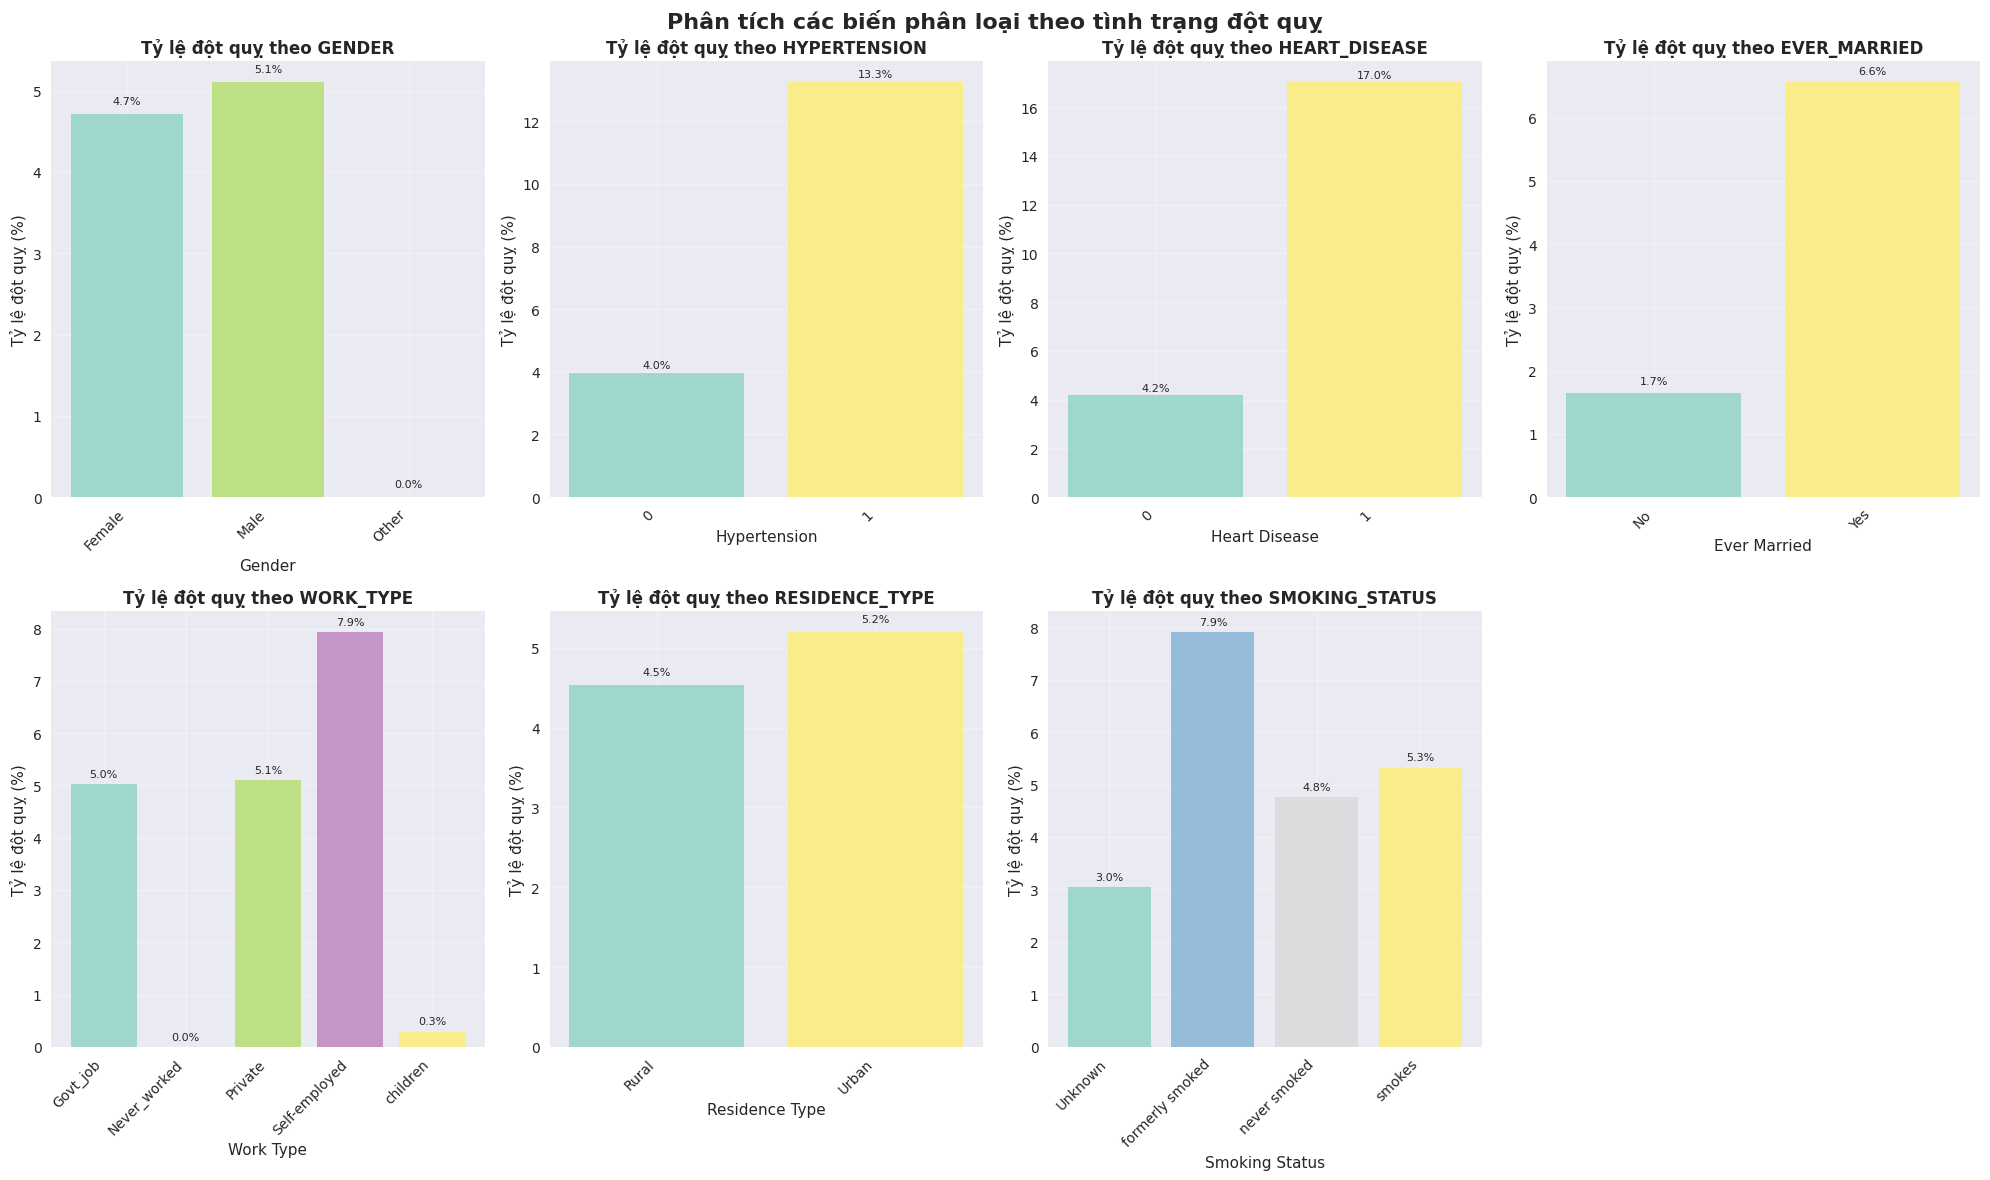

In [12]:
# Tạo biểu đồ cho các biến phân loại quan trọng
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Phân tích các biến phân loại theo tình trạng đột quỵ', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, bien in enumerate(cacBienPhanLoai):
    if i < len(axes):
        # Tính tỷ lệ đột quỵ cho mỗi nhóm
        tyLeTheoNhom = duLieu.groupby(bien)['stroke'].mean() * 100

        # Tạo biểu đồ cột
        bars = axes[i].bar(range(len(tyLeTheoNhom)), tyLeTheoNhom.values,
                          color=plt.cm.Set3(np.linspace(0, 1, len(tyLeTheoNhom))),
                          alpha=0.8)

        axes[i].set_title(f'Tỷ lệ đột quỵ theo {bien.upper()}', fontweight='bold')
        axes[i].set_xlabel(bien.replace('_', ' ').title())
        axes[i].set_ylabel('Tỷ lệ đột quỵ (%)')
        axes[i].set_xticks(range(len(tyLeTheoNhom)))
        axes[i].set_xticklabels(tyLeTheoNhom.index, rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3)

        # Thêm nhãn trên cột
        for bar, value in zip(bars, tyLeTheoNhom.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                        f'{value:.1f}%', ha='center', va='bottom', fontsize=8)

# Ẩn subplot thừa
if len(cacBienPhanLoai) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 5. PHÂN TÍCH TƯƠNG QUAN

In [13]:
# Tạo dữ liệu số cho phân tích tương quan
print("🔗 PHÂN TÍCH TƯƠNG QUAN:")
print("="*50)

# Chọn các biến số và biến binary
cacBienSoHoa = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Thêm biến ever_married được mã hóa
duLieuTuongQuan = duLieu[cacBienSoHoa].copy()
duLieuTuongQuan['ever_married_encoded'] = (duLieu['ever_married'] == 'Yes').astype(int)
duLieuTuongQuan['gender_male'] = (duLieu['gender'] == 'Male').astype(int)
duLieuTuongQuan['residence_urban'] = (duLieu['Residence_type'] == 'Urban').astype(int)

# Mã hóa smoking_status
duLieuTuongQuan['smoking_formerly'] = (duLieu['smoking_status'] == 'formerly smoked').astype(int)
duLieuTuongQuan['smoking_smokes'] = (duLieu['smoking_status'] == 'smokes').astype(int)

# Tính ma trận tương quan
maTranTuongQuan = duLieuTuongQuan.corr()

print("📊 Ma trận tương quan với biến mục tiêu 'stroke':")
tuongQuanVoiStroke = maTranTuongQuan['stroke'].sort_values(key=abs, ascending=False)
print(tuongQuanVoiStroke.round(4))

🔗 PHÂN TÍCH TƯƠNG QUAN:
📊 Ma trận tương quan với biến mục tiêu 'stroke':
stroke                  1.0000
age                     0.2453
heart_disease           0.1349
avg_glucose_level       0.1319
hypertension            0.1279
ever_married_encoded    0.1083
smoking_formerly        0.0646
bmi                     0.0361
residence_urban         0.0155
gender_male             0.0091
smoking_smokes          0.0089
Name: stroke, dtype: float64


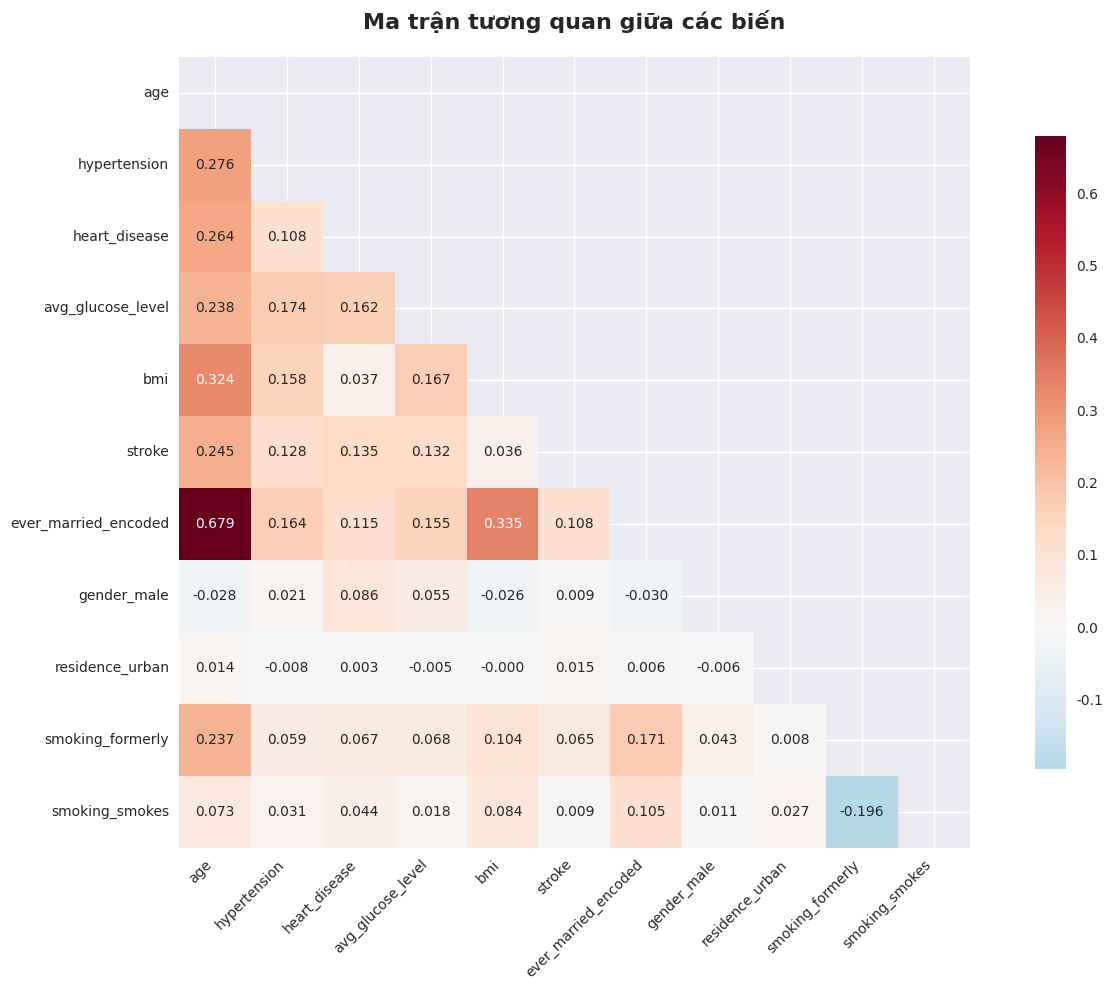


🔍 PHÂN TÍCH CÁC TƯƠNG QUAN MẠNH VỚI ĐỘT QUỴ:
--------------------------------------------------
📈 age: 0.2453 (Thuận, Trung bình)
📈 heart_disease: 0.1349 (Thuận, Trung bình)
📈 avg_glucose_level: 0.1319 (Thuận, Trung bình)
📈 hypertension: 0.1279 (Thuận, Trung bình)
📈 ever_married_encoded: 0.1083 (Thuận, Trung bình)


In [14]:
# Vẽ heatmap ma trận tương quan
plt.figure(figsize=(14, 10))

# Tạo mask cho nửa trên của ma trận
mask = np.triu(np.ones_like(maTranTuongQuan, dtype=bool))

# Vẽ heatmap
sns.heatmap(maTranTuongQuan,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Ma trận tương quan giữa các biến', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Phân tích các tương quan mạnh
print("\n🔍 PHÂN TÍCH CÁC TƯƠNG QUAN MẠNH VỚI ĐỘT QUỴ:")
print("-" * 50)

tuongQuanManhVoiStroke = tuongQuanVoiStroke[abs(tuongQuanVoiStroke) > 0.1]
tuongQuanManhVoiStroke = tuongQuanManhVoiStroke.drop('stroke')  # Bỏ chính nó

for bien, giaTriTuongQuan in tuongQuanManhVoiStroke.items():
    huongTuongQuan = "Thuận" if giaTriTuongQuan > 0 else "Nghịch"
    mucDoTuongQuan = "Mạnh" if abs(giaTriTuongQuan) > 0.3 else "Trung bình" if abs(giaTriTuongQuan) > 0.1 else "Yếu"
    print(f"📈 {bien}: {giaTriTuongQuan:.4f} ({huongTuongQuan}, {mucDoTuongQuan})")

## 6. PHÂN TÍCH THEO NHÓM TUỔI

In [15]:
# Tạo nhóm tuổi nếu chưa có
if 'nhomTuoi' not in duLieu.columns:
    def phanLoaiTuoi(tuoi):
        if tuoi < 18:
            return 'Trẻ em (<18)'
        elif tuoi < 30:
            return 'Tuổi trẻ (18-29)'
        elif tuoi < 50:
            return 'Trung niên (30-49)'
        elif tuoi < 65:
            return 'Trước tuổi hưu (50-64)'
        else:
            return 'Tuổi cao (≥65)'

    duLieu['nhomTuoi'] = duLieu['age'].apply(phanLoaiTuoi)

print("👥 PHÂN TÍCH THEO NHÓM TUỔI:")
print("="*50)

# Thống kê theo nhóm tuổi
thongKeNhomTuoi = duLieu.groupby('nhomTuoi').agg({
    'stroke': ['count', 'sum', 'mean'],
    'age': ['mean', 'std'],
    'avg_glucose_level': 'mean',
    'bmi': 'mean',
    'hypertension': 'mean',
    'heart_disease': 'mean'
}).round(3)

# Làm phẳng tên cột
thongKeNhomTuoi.columns = ['_'.join(col).strip() for col in thongKeNhomTuoi.columns]
thongKeNhomTuoi = thongKeNhomTuoi.rename(columns={
    'stroke_count': 'tongSo',
    'stroke_sum': 'soCoDotQuy',
    'stroke_mean': 'tyLeDotQuy',
    'age_mean': 'tuoiTrungBinh',
    'age_std': 'tuoiDoLech',
    'avg_glucose_level_mean': 'glucoseTB',
    'bmi_mean': 'bmiTB',
    'hypertension_mean': 'tyLeTangHuyetAp',
    'heart_disease_mean': 'tyLeBenhTim'
})

thongKeNhomTuoi['tyLeDotQuyPhanTram'] = (thongKeNhomTuoi['tyLeDotQuy'] * 100).round(2)

print(thongKeNhomTuoi)

👥 PHÂN TÍCH THEO NHÓM TUỔI:
              tongSo  soCoDotQuy  tyLeDotQuy  tuoiTrungBinh  tuoiDoLech  \
nhomTuoi                                                                  
treEm            856           2       0.002          8.561       5.387   
trungNien       1385          18       0.013         39.804       5.746   
truocTuoiHuu    1183          70       0.059         56.613       4.230   
tuoiCao         1027         159       0.155         73.969       5.338   
tuoiTre          659           0       0.000         23.508       3.443   

              glucoseTB   bmiTB  tyLeTangHuyetAp  tyLeBenhTim  \
nhomTuoi                                                        
treEm            94.386  21.549            0.001        0.001   
trungNien        99.349  31.218            0.054        0.009   
truocTuoiHuu    113.676  31.441            0.154        0.068   
tuoiCao         123.919  29.452            0.224        0.175   
tuoiTre          94.504  27.860            0.015        

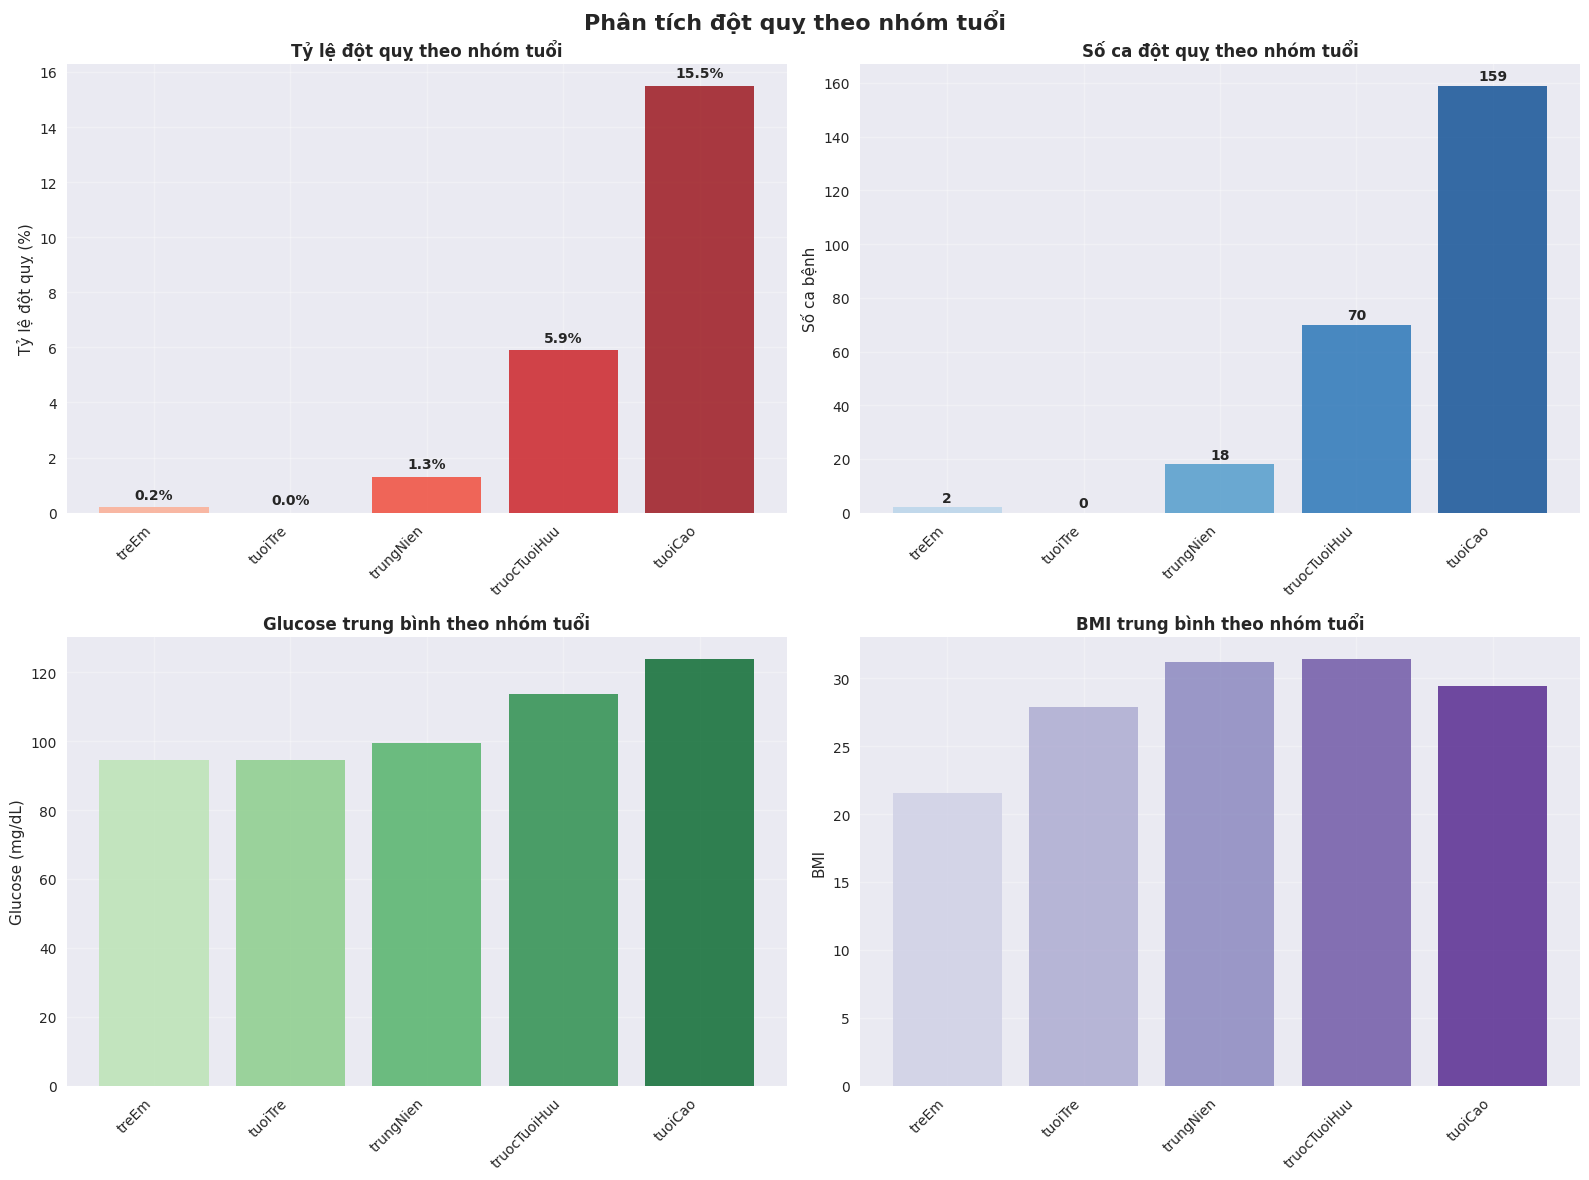

In [20]:
# Biểu đồ phân tích theo nhóm tuổi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Phân tích đột quỵ theo nhóm tuổi', fontsize=16, fontweight='bold')

# Sắp xếp nhóm tuổi theo thứ tự logic
thuTuNhomTuoi = ['treEm', 'tuoiTre', 'trungNien',
                 'truocTuoiHuu', 'tuoiCao']
duLieuNhomTuoi = thongKeNhomTuoi.reindex(thuTuNhomTuoi)

# 1. Tỷ lệ đột quỵ theo nhóm tuổi
bars1 = axes[0,0].bar(range(len(duLieuNhomTuoi)), duLieuNhomTuoi['tyLeDotQuyPhanTram'],
                     color=plt.cm.Reds(np.linspace(0.3, 0.9, len(duLieuNhomTuoi))), alpha=0.8)
axes[0,0].set_title('Tỷ lệ đột quỵ theo nhóm tuổi', fontweight='bold')
axes[0,0].set_ylabel('Tỷ lệ đột quỵ (%)')
axes[0,0].set_xticks(range(len(duLieuNhomTuoi)))
axes[0,0].set_xticklabels(duLieuNhomTuoi.index, rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)

# Thêm nhãn
for bar, value in zip(bars1, duLieuNhomTuoi['tyLeDotQuyPhanTram']):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                  f'{value:.1f}%' if not pd.isna(value) else 'N/A', ha='center', va='bottom', fontweight='bold')

# 2. Số lượng ca bệnh theo nhóm tuổi
bars2 = axes[0,1].bar(range(len(duLieuNhomTuoi)), duLieuNhomTuoi['soCoDotQuy'],
                     color=plt.cm.Blues(np.linspace(0.3, 0.9, len(duLieuNhomTuoi))), alpha=0.8)
axes[0,1].set_title('Số ca đột quỵ theo nhóm tuổi', fontweight='bold')
axes[0,1].set_ylabel('Số ca bệnh')
axes[0,1].set_xticks(range(len(duLieuNhomTuoi)))
axes[0,1].set_xticklabels(duLieuNhomTuoi.index, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3)

for bar, value in zip(bars2, duLieuNhomTuoi['soCoDotQuy']):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                  f'{int(value)}' if not pd.isna(value) else '0', ha='center', va='bottom', fontweight='bold')

# 3. Glucose trung bình theo nhóm tuổi
bars3 = axes[1,0].bar(range(len(duLieuNhomTuoi)), duLieuNhomTuoi['glucoseTB'],
                     color=plt.cm.Greens(np.linspace(0.3, 0.9, len(duLieuNhomTuoi))), alpha=0.8)
axes[1,0].set_title('Glucose trung bình theo nhóm tuổi', fontweight='bold')
axes[1,0].set_ylabel('Glucose (mg/dL)')
axes[1,0].set_xticks(range(len(duLieuNhomTuoi)))
axes[1,0].set_xticklabels(duLieuNhomTuoi.index, rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3)

# 4. BMI trung bình theo nhóm tuổi
bars4 = axes[1,1].bar(range(len(duLieuNhomTuoi)), duLieuNhomTuoi['bmiTB'],
                     color=plt.cm.Purples(np.linspace(0.3, 0.9, len(duLieuNhomTuoi))), alpha=0.8)
axes[1,1].set_title('BMI trung bình theo nhóm tuổi', fontweight='bold')
axes[1,1].set_ylabel('BMI')
axes[1,1].set_xticks(range(len(duLieuNhomTuoi)))
axes[1,1].set_xticklabels(duLieuNhomTuoi.index, rotation=45, ha='right')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. PHÂN TÍCH CÁC YẾU TỐ NGUY CƠ PHỐI HỢP

In [17]:
# Tạo điểm nguy cơ tổng hợp
print("⚠️  PHÂN TÍCH CÁC YẾU TỐ NGUY CƠ PHỐI HỢP:")
print("="*60)

# Tạo điểm nguy cơ nếu chưa có
if 'diemNguyCo' not in duLieu.columns:
    duLieu['diemNguyCo'] = (
        duLieu['hypertension'] +
        duLieu['heart_disease'] +
        (duLieu['age'] > 65).astype(int) +
        (duLieu['bmi'] > 30).astype(int) +
        (duLieu['avg_glucose_level'] > 126).astype(int)
    )

# Phân tích theo điểm nguy cơ
phanTichNguyCo = duLieu.groupby('diemNguyCo').agg({
    'stroke': ['count', 'sum', 'mean'],
    'age': 'mean',
    'avg_glucose_level': 'mean',
    'bmi': 'mean'
}).round(3)

phanTichNguyCo.columns = ['tongSo', 'soCoDotQuy', 'tyLeDotQuy', 'tuoiTB', 'glucoseTB', 'bmiTB']
phanTichNguyCo['tyLePhanTram'] = (phanTichNguyCo['tyLeDotQuy'] * 100).round(2)

print("📊 Phân tích theo điểm nguy cơ (0-5 điểm):")
print(phanTichNguyCo)

# Tính odds ratio cho từng mức điểm nguy cơ
print("\n📈 Odds Ratio theo điểm nguy cơ (so với điểm 0):")
print("-" * 50)

tyLeDiemGoc = phanTichNguyCo.loc[0, 'tyLeDotQuy'] if 0 in phanTichNguyCo.index else 0.001
oddsGoc = tyLeDiemGoc / (1 - tyLeDiemGoc)

for diem in phanTichNguyCo.index:
    if diem > 0:
        tyLe = phanTichNguyCo.loc[diem, 'tyLeDotQuy']
        odds = tyLe / (1 - tyLe) if tyLe < 1 else float('inf')
        oddsRatio = odds / oddsGoc if oddsGoc > 0 else float('inf')
        print(f"Điểm {diem}: OR = {oddsRatio:.2f} (Tỷ lệ: {phanTichNguyCo.loc[diem, 'tyLePhanTram']:.1f}%)")

⚠️  PHÂN TÍCH CÁC YẾU TỐ NGUY CƠ PHỐI HỢP:
📊 Phân tích theo điểm nguy cơ (0-5 điểm):
            tongSo  soCoDotQuy  tyLeDotQuy  tuoiTB  glucoseTB   bmiTB  \
diemNguyCo                                                              
0             2180          30       0.014  29.590     87.243  23.676   
1             1758          73       0.042  46.238    100.340  32.074   
2              774          73       0.094  60.948    134.367  33.680   
3              294          50       0.170  68.895    176.119  33.502   
4               95          19       0.200  73.832    189.523  34.304   
5                9           4       0.444  72.444    227.078  34.244   

            tyLePhanTram  
diemNguyCo                
0                    1.4  
1                    4.2  
2                    9.4  
3                   17.0  
4                   20.0  
5                   44.4  

📈 Odds Ratio theo điểm nguy cơ (so với điểm 0):
--------------------------------------------------
Điểm 1: OR = 3

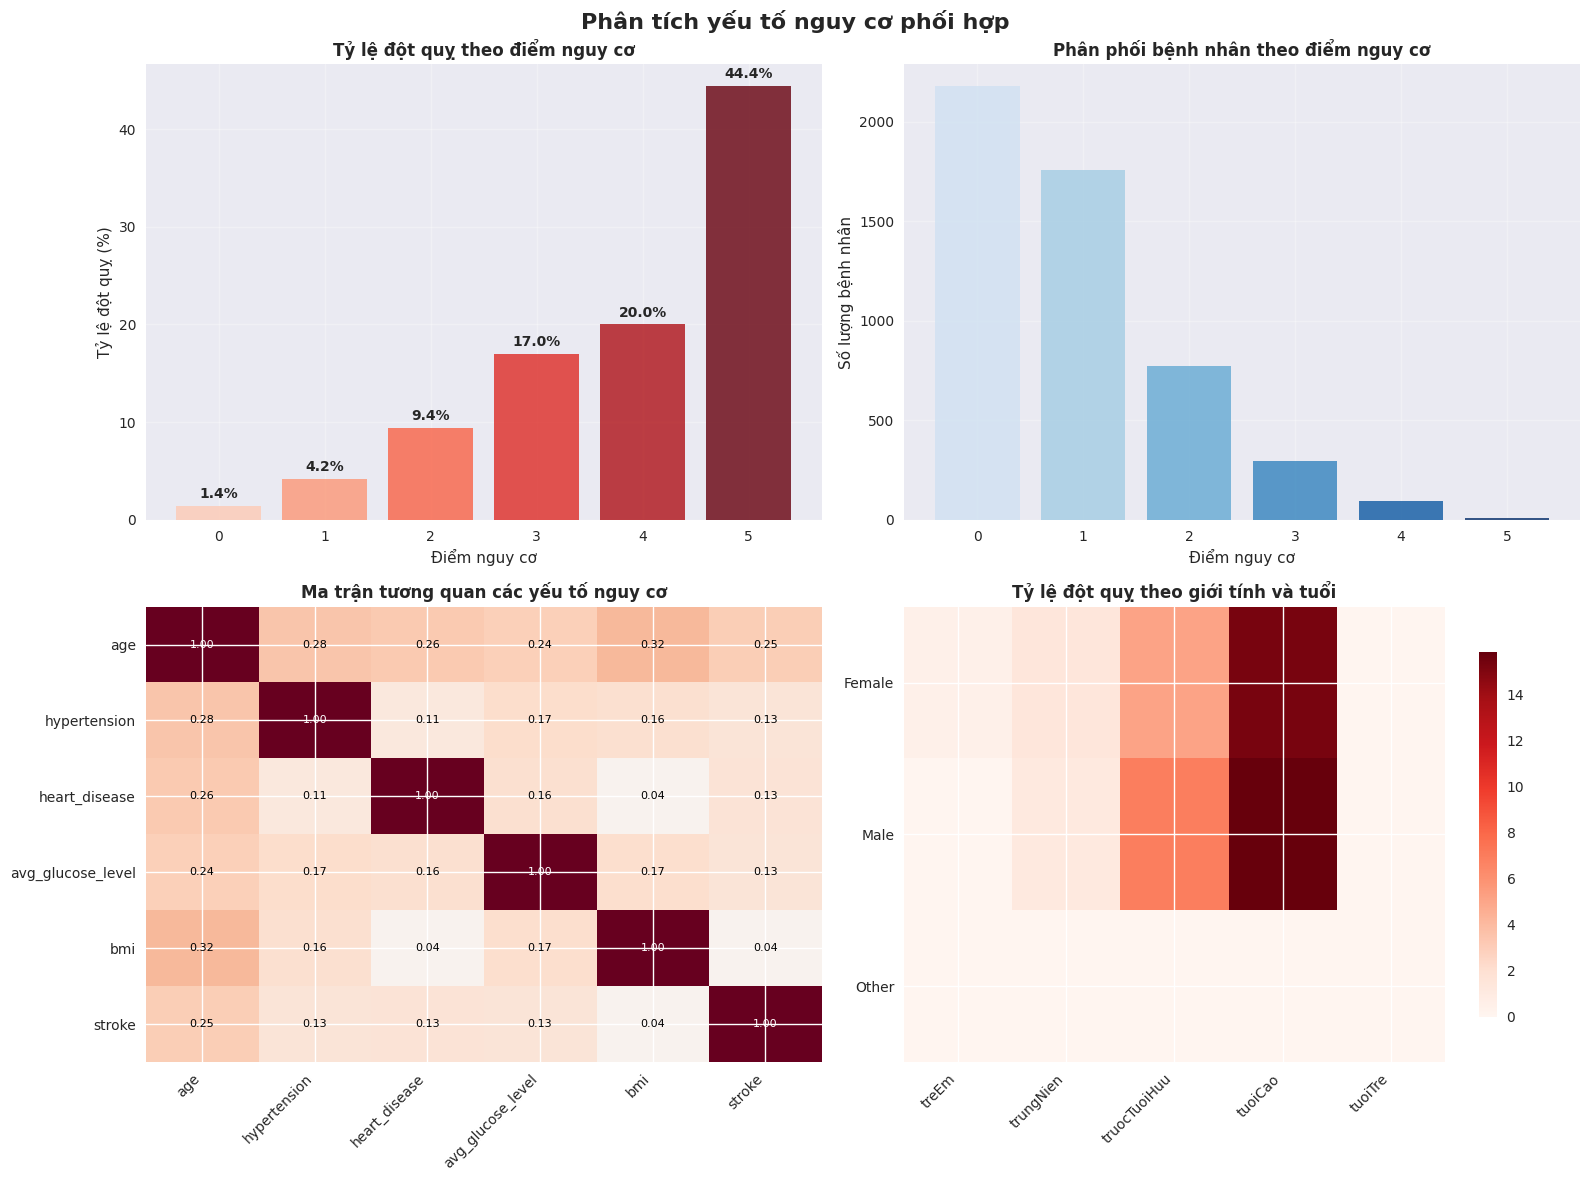

In [18]:
# Biểu đồ phân tích nguy cơ phối hợp
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Phân tích yếu tố nguy cơ phối hợp', fontsize=16, fontweight='bold')

# 1. Tỷ lệ đột quỵ theo điểm nguy cơ
bars1 = axes[0,0].bar(phanTichNguyCo.index, phanTichNguyCo['tyLePhanTram'],
                     color=plt.cm.Reds(np.linspace(0.2, 1.0, len(phanTichNguyCo))), alpha=0.8)
axes[0,0].set_title('Tỷ lệ đột quỵ theo điểm nguy cơ', fontweight='bold')
axes[0,0].set_xlabel('Điểm nguy cơ')
axes[0,0].set_ylabel('Tỷ lệ đột quỵ (%)')
axes[0,0].grid(True, alpha=0.3)

for bar, value in zip(bars1, phanTichNguyCo['tyLePhanTram']):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                  f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Số lượng bệnh nhân theo điểm nguy cơ
bars2 = axes[0,1].bar(phanTichNguyCo.index, phanTichNguyCo['tongSo'],
                     color=plt.cm.Blues(np.linspace(0.2, 1.0, len(phanTichNguyCo))), alpha=0.8)
axes[0,1].set_title('Phân phối bệnh nhân theo điểm nguy cơ', fontweight='bold')
axes[0,1].set_xlabel('Điểm nguy cơ')
axes[0,1].set_ylabel('Số lượng bệnh nhân')
axes[0,1].grid(True, alpha=0.3)

# 3. Heatmap ma trận tương quan các yếu tố nguy cơ
cacYeuToNguyCo = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
maTranNguyCo = duLieu[cacYeuToNguyCo].corr()

im = axes[1,0].imshow(maTranNguyCo, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1,0].set_title('Ma trận tương quan các yếu tố nguy cơ', fontweight='bold')
axes[1,0].set_xticks(range(len(cacYeuToNguyCo)))
axes[1,0].set_yticks(range(len(cacYeuToNguyCo)))
axes[1,0].set_xticklabels(cacYeuToNguyCo, rotation=45, ha='right')
axes[1,0].set_yticklabels(cacYeuToNguyCo)

# Thêm giá trị tương quan
for i in range(len(cacYeuToNguyCo)):
    for j in range(len(cacYeuToNguyCo)):
        axes[1,0].text(j, i, f'{maTranNguyCo.iloc[i,j]:.2f}',
                      ha='center', va='center', fontsize=8,
                      color='white' if abs(maTranNguyCo.iloc[i,j]) > 0.5 else 'black')

# 4. Phân tích theo giới tính và nhóm tuổi
phanTichGioiTinhTuoi = duLieu.groupby(['gender', 'nhomTuoi'])['stroke'].mean() * 100
phanTichGioiTinhTuoi = phanTichGioiTinhTuoi.unstack(fill_value=0)

im2 = axes[1,1].imshow(phanTichGioiTinhTuoi.values, cmap='Reds', aspect='auto')
axes[1,1].set_title('Tỷ lệ đột quỵ theo giới tính và tuổi', fontweight='bold')
axes[1,1].set_xticks(range(len(phanTichGioiTinhTuoi.columns)))
axes[1,1].set_yticks(range(len(phanTichGioiTinhTuoi.index)))
axes[1,1].set_xticklabels(phanTichGioiTinhTuoi.columns, rotation=45, ha='right')
axes[1,1].set_yticklabels(phanTichGioiTinhTuoi.index)

# Thêm colorbar
plt.colorbar(im2, ax=axes[1,1], shrink=0.8)

plt.tight_layout()
plt.show()

## 8. TÓM TẮT CÁC INSIGHT QUAN TRỌNG

In [19]:
# Tóm tắt các insight quan trọng
print("🎯 TÓM TẮT CÁC INSIGHT QUAN TRỌNG:")
print("="*60)

# 1. Thống kê tổng quan
tyLeMacBenh = (duLieu['stroke'].sum() / len(duLieu)) * 100
tuoiTrungBinhMacBenh = duLieu[duLieu['stroke'] == 1]['age'].mean()
tuoiTrungBinhKhongMacBenh = duLieu[duLieu['stroke'] == 0]['age'].mean()

print(f"\n📊 THỐNG KÊ TỔNG QUAN:")
print(f"   • Tỷ lệ mắc đột quỵ: {tyLeMacBenh:.2f}%")
print(f"   • Tuổi trung bình nhóm mắc bệnh: {tuoiTrungBinhMacBenh:.1f} tuổi")
print(f"   • Tuổi trung bình nhóm không mắc: {tuoiTrungBinhKhongMacBenh:.1f} tuổi")
print(f"   • Chênh lệch tuổi: {tuoiTrungBinhMacBenh - tuoiTrungBinhKhongMacBenh:.1f} tuổi")

# 2. Yếu tố nguy cơ quan trọng nhất
print(f"\n⚠️  CÁC YẾU TỐ NGUY CƠ QUAN TRỌNG:")

# Tuổi
tyLeNhomTuoiCao = duLieu[duLieu['age'] >= 65]['stroke'].mean() * 100
tyLeNhomTuoiThap = duLieu[duLieu['age'] < 65]['stroke'].mean() * 100
print(f"   • Tuổi ≥65: {tyLeNhomTuoiCao:.1f}% vs <65 tuổi: {tyLeNhomTuoiThap:.1f}%")

# Tăng huyết áp
tyLeTangHuyetAp = duLieu[duLieu['hypertension'] == 1]['stroke'].mean() * 100
tyLeKhongTangHuyetAp = duLieu[duLieu['hypertension'] == 0]['stroke'].mean() * 100
print(f"   • Tăng huyết áp: {tyLeTangHuyetAp:.1f}% vs Không: {tyLeKhongTangHuyetAp:.1f}%")

# Bệnh tim
tyLeBenhTim = duLieu[duLieu['heart_disease'] == 1]['stroke'].mean() * 100
tyLeKhongBenhTim = duLieu[duLieu['heart_disease'] == 0]['stroke'].mean() * 100
print(f"   • Bệnh tim: {tyLeBenhTim:.1f}% vs Không: {tyLeKhongBenhTim:.1f}%")

# Glucose cao
tyLeGlucoseCao = duLieu[duLieu['avg_glucose_level'] > 126]['stroke'].mean() * 100
tyLeGlucoseBinhThuong = duLieu[duLieu['avg_glucose_level'] <= 126]['stroke'].mean() * 100
print(f"   • Glucose >126: {tyLeGlucoseCao:.1f}% vs ≤126: {tyLeGlucoseBinhThuong:.1f}%")

# 3. Phân tích theo điểm nguy cơ
print(f"\n🎯 PHÂN TÍCH THEO ĐIỂM NGUY CƠ:")
for diem in sorted(phanTichNguyCo.index):
    soLuong = phanTichNguyCo.loc[diem, 'tongSo']
    tyLe = phanTichNguyCo.loc[diem, 'tyLePhanTram']
    print(f"   • Điểm {diem}: {soLuong:,} người ({tyLe:.1f}% mắc đột quỵ)")

# 4. Khuyến nghị
print(f"\n💡 KHUYẾN NGHỊ:")
print(f"   • Tập trung theo dõi nhóm ≥65 tuổi (nguy cơ cao nhất)")
print(f"   • Kiểm soát tăng huyết áp và bệnh tim mạch")
print(f"   • Quản lý đường huyết, đặc biệt với bệnh nhân tiểu đường")
print(f"   • Cần mô hình dự đoán để sàng lọc sớm nhóm nguy cơ cao")
print(f"   • Dữ liệu mất cân bằng - cần kỹ thuật xử lý đặc biệt khi modeling")

print("\n" + "="*60)
print("✅ HOÀN THÀNH PHÂN TÍCH THỐNG KÊ MÔ TẢ VÀ TRỰC QUAN HÓA")
print("📋 Dữ liệu đã sẵn sàng cho bước xây dựng mô hình machine learning")
print("="*60)

🎯 TÓM TẮT CÁC INSIGHT QUAN TRỌNG:

📊 THỐNG KÊ TỔNG QUAN:
   • Tỷ lệ mắc đột quỵ: 4.87%
   • Tuổi trung bình nhóm mắc bệnh: 67.7 tuổi
   • Tuổi trung bình nhóm không mắc: 42.0 tuổi
   • Chênh lệch tuổi: 25.8 tuổi

⚠️  CÁC YẾU TỐ NGUY CƠ QUAN TRỌNG:
   • Tuổi ≥65: 15.5% vs <65 tuổi: 2.2%
   • Tăng huyết áp: 13.3% vs Không: 4.0%
   • Bệnh tim: 17.0% vs Không: 4.2%
   • Glucose >126: 10.2% vs ≤126: 3.6%

🎯 PHÂN TÍCH THEO ĐIỂM NGUY CƠ:
   • Điểm 0: 2,180 người (1.4% mắc đột quỵ)
   • Điểm 1: 1,758 người (4.2% mắc đột quỵ)
   • Điểm 2: 774 người (9.4% mắc đột quỵ)
   • Điểm 3: 294 người (17.0% mắc đột quỵ)
   • Điểm 4: 95 người (20.0% mắc đột quỵ)
   • Điểm 5: 9 người (44.4% mắc đột quỵ)

💡 KHUYẾN NGHỊ:
   • Tập trung theo dõi nhóm ≥65 tuổi (nguy cơ cao nhất)
   • Kiểm soát tăng huyết áp và bệnh tim mạch
   • Quản lý đường huyết, đặc biệt với bệnh nhân tiểu đường
   • Cần mô hình dự đoán để sàng lọc sớm nhóm nguy cơ cao
   • Dữ liệu mất cân bằng - cần kỹ thuật xử lý đặc biệt khi modeling

✅ 